In [1]:
# Standard Libraries


import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Functions


def make_ax(data, x, xlabel = 'x', title = 'Title', figsize = (10, 10), num_subplots = 1):
    # Make fig and ax
    fig, axs = plt.subplots(num_subplots, 1, figsize=figsize, sharex=True)
    
    # Remove horizontal space between axes
    fig.subplots_adjust(hspace=0.05)
    
    # Make colormap
    cmap = plt.get_cmap("jet")
    
    # Make black boxes
    for i in range(num_subplots):
        # Plot settings
        axs[i].set_facecolor('black')
        axs[i].tick_params(axis='both', direction='in', color='white')
        axs[i].tick_params(axis='x', top=True, labelsize=16)
        axs[i].tick_params(axis='y', left=False, labelleft=False)
        axs[i].set_ylabel(ylabels[i], rotation=0, fontsize=16, labelpad=18)
        if i == 0:
            axs[i].set_title(title, fontsize=20)
        elif i == num_subplots - 1:
            axs[i].set_xlabel(xlabel, fontsize=16)
            
        # Plot data
        wavelengths = list(data[names[i]]['Wavelength'])
        for wavelength in wavelengths:
            color = cmap((wavelength - 380)/(750 - 380))
            axs[i].axvline(x=wavelength, color=color)
    # Return fig and ax
    return fig, axs


def plot_ax(save = False, filename = 'default.pdf'):
    if save:
        plt.savefig(filename)
    plt.show()

In [3]:
# Variables


names = ['Argon1', 'H2_1', 'Mercury1', 'Ne1_nonsat', 'Xe1']
ylabels = ['Ar', 'H2', 'Hg', 'Ne', 'Xe']

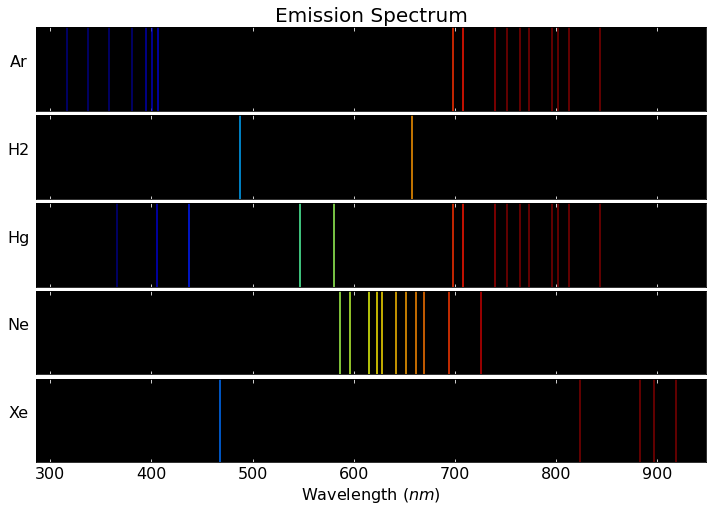

In [5]:
# Plot absorbtion sprectrum data


# Load in data
data = {}
for name in names:
    df = pd.read_csv(f'../Cleaned_Data/Emission_data/emission_spectrum_{name}_data_cleaned.csv')
    data[name] = df


# Make ax and fig for plotting data
fig, ax = make_ax(data, x='Wavelength', title='Emission Spectrum',
                 figsize=(12,8), xlabel='Wavelength ($nm$)', num_subplots=len(names))


# Plot and save fig
plot_ax(save=True, filename=f'../../../Final_graphs/emission_spectrum_plot.pdf')